In [481]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [482]:
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [483]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [484]:
import string

In [485]:
import screed # A Python library for reading FASTA and FASQ file format.
def readFastaFile(inputfile):
    """
    Reads and returns file as FASTA format with special characters removed.
    """
    with screed.open(inputfile) as seqfile:
        for read in seqfile:
            seq = read.sequence
    return seq

In [486]:
import glob
import re
import os

# Define folder paths
bird_folder = r"C:\Users\risha\OneDrive\Desktop\Birds"
fish_folder = r"C:\Users\risha\OneDrive\Desktop\Fish"
mams_folder = r"C:\Users\risha\OneDrive\Desktop\Mammals"

# Use glob to find file names with complete paths
bird_fnames = glob.glob(bird_folder + '/*.txt')
fish_fnames = glob.glob(fish_folder + '/*.txt')
mams_fnames = glob.glob(mams_folder + '/*.txt')

bird = []
fish = []
mams = []

# Append content from each file if `readFastaFile` is defined
for fname in bird_fnames:
    bird.append(readFastaFile(fname))

for fname in fish_fnames:
    fish.append(readFastaFile(fname))

for fname in mams_fnames:
    mams.append(readFastaFile(fname))


In [487]:
print(np.shape(bird), np.shape(fish), np.shape(mams))
print(len(bird[0]))
print(len(bird[1]))
print(len(bird[2]))
print(len(bird[3]))
print(bird[1][0:10])

(553,) (2313,) (874,)
16714
17070
16698
16702
TAATTAAACG


In [488]:
#----------
# At the moment and for validation purposes, we keep all conversion steps separated. 
#---------- 
def conversion_DNA_str(X,Y,instr, outstr):
        for j in range(0,len(X)):
            Y.append(X[j].translate({ord(x): y for (x, y) in zip(instr, outstr)}))        
        return Y
#----------    
def conversion_DNA_num(X,Y):
        for j in range(0,len(X)):
            Y.append([int(x) for x in str(X[j])])     
        return Y

In [489]:
#------------------
#  Testing various types of numerical representations. 
#------------------
instr = "TCAG"
#outstr = "0010" ; cornr= 0.5   #  Just A representation. Substract 0.5 for symmetrisation of signal relative to x-axis. 
#outstr = "1234" ; cornr=-5/2   #  Integer representation I. Not tested
#outstr = "0123" ; cornr=-3/2   #  Integer representation II. Not tested
outstr = "2200"  ; cornr= 1    #  PP representation  [T,C]= 1, [A,G]= -1  Must substract 1 in all DNA sequences matrices  ! 

DNA_B=[]
DNA_M=[]
DNA_F=[]
#---------
DNA_B=conversion_DNA_str(bird, DNA_B,instr, outstr)
DNA_M=conversion_DNA_str(fish, DNA_M,instr, outstr)
DNA_F=conversion_DNA_str(mams, DNA_F,instr, outstr)
#--------- 
B=[]
F=[]
M=[]

B=conversion_DNA_num(DNA_B,B)
M=conversion_DNA_num(DNA_M,M)
F=conversion_DNA_num(DNA_F,F)

In [490]:
# DNA sequences matrices 
Mat_DNA_B = np.array([np.array(x) for x in B], dtype=object) - cornr
Mat_DNA_F = np.array([np.array(x) for x in F], dtype=object) - cornr
Mat_DNA_M = np.array([np.array(x) for x in M], dtype=object) - cornr

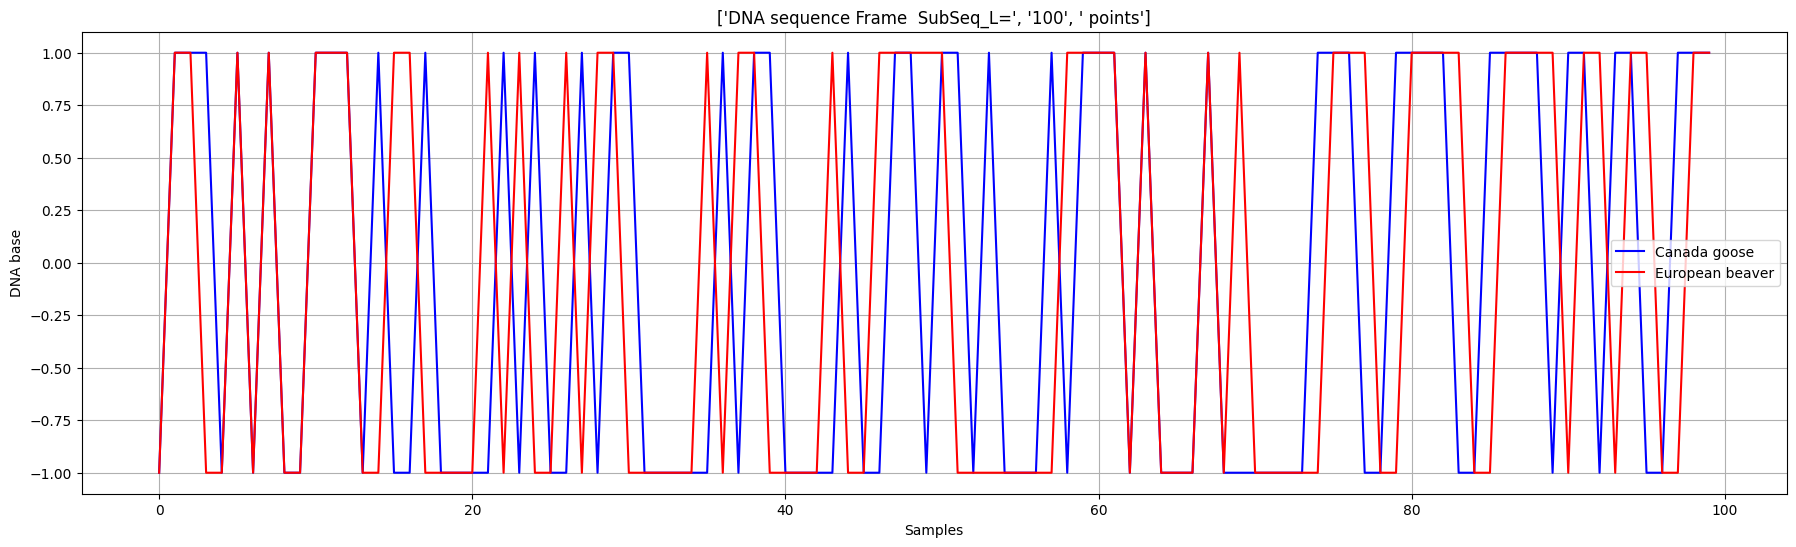

In [491]:
SubSeq_L=128
SubSeq_L=100   # Length of sub-sequence 
plt.figure(figsize=(22, 6))
plt.plot(Mat_DNA_B[32][0:SubSeq_L],color='b')  # single slice
plt.plot(Mat_DNA_M[826][0:SubSeq_L],color='r')  # single slice
plt.xlabel("Samples")
plt.ylabel("DNA base")
plt.title(["DNA sequence Frame  SubSeq_L=", str(SubSeq_L)," points"])
plt.legend(['Canada goose', 'European beaver'])
plt.grid()
plt.show()

In [492]:
count_DNA_B_x= np.empty(len(Mat_DNA_B))
count_DNA_B_y= np.empty(len(Mat_DNA_B))
count_DNA_F_x= np.empty(len(Mat_DNA_F))
count_DNA_F_y= np.empty(len(Mat_DNA_F))
count_DNA_M_x= np.empty(len(Mat_DNA_M))
count_DNA_M_y= np.empty(len(Mat_DNA_M))

for j in range(0,len(Mat_DNA_B)):
     count_DNA_B_x[j] =   np.count_nonzero(Mat_DNA_B[j] == 1)
     count_DNA_B_y[j] = len(Mat_DNA_B[j]) - count_DNA_B_x[j]
    
for j in range(0,len(Mat_DNA_F)):
     count_DNA_F_x[j] =   np.count_nonzero(Mat_DNA_F[j] == 1)
     count_DNA_F_y[j] = len(Mat_DNA_F[j]) - count_DNA_F_x[j]

        
for j in range(0,len(Mat_DNA_M)):
     count_DNA_M_x[j] =   np.count_nonzero(Mat_DNA_M[j] == 1)
     count_DNA_M_y[j] = len(Mat_DNA_M[j]) - count_DNA_M_x[j]

#count_DNA_B_x[0:10], count_DNA_B_y[0:10] 

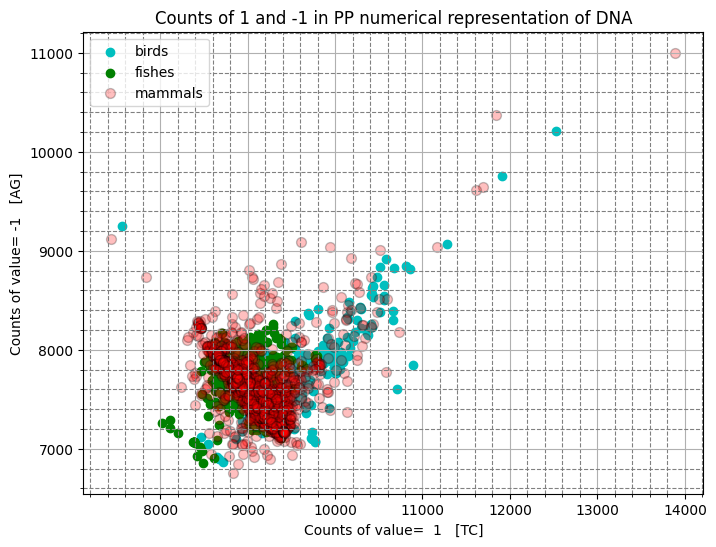

In [493]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(count_DNA_B_x, count_DNA_B_y, c="c")
plt.scatter(count_DNA_F_x, count_DNA_F_y, c="g")
plt.scatter(count_DNA_M_x, count_DNA_M_y, s=50, c="r", alpha=0.25, edgecolors="k")

# Add legend and labels
plt.legend(['birds', 'fishes', 'mammals'])
plt.title("Counts of 1 and -1 in PP numerical representation of DNA") 
plt.xlabel("Counts of value=  1   [TC]") 
plt.ylabel("Counts of value= -1   [AG]")

# Enable minor ticks and add grid
plt.minorticks_on()
plt.grid(which='minor', color='grey', linestyle='--')  # Minor grid
plt.grid(which='major')  # Major grid

plt.show()


In [494]:
print("Length of Birds 1st DNA sequence: ",  len(Mat_DNA_B[0]), " |||  Length of Birds 2nd DNA sequence: ", len(Mat_DNA_B[1]))

Length of Birds 1st DNA sequence:  16714  |||  Length of Birds 2nd DNA sequence:  17070


In [495]:
print("Number of DNA sequences:, Bird: ", Mat_DNA_B.shape, " Fishes: ", Mat_DNA_F.shape," Mammals: " , Mat_DNA_M.shape) 

Number of DNA sequences:, Bird:  (553,)  Fishes:  (874,)  Mammals:  (2313,)


In [496]:
import sounddevice as sd

fs = 8000    
data = 0.25*np.concatenate( (Mat_DNA_B[32], Mat_DNA_B[32], Mat_DNA_B[32],Mat_DNA_B[32]))     # -12 dB 
data = 0.25*np.concatenate( (Mat_DNA_M[826], Mat_DNA_M[826], Mat_DNA_M[826],Mat_DNA_M[826]))     # -12 dB 

np.shape(data)
sd.play(data, fs)

In [497]:
from scipy import signal
from skimage import util
import scipy.signal

# Fonction FFT spectrum. Includes [b,a] signal filter in the "time" domain. 
def FFT_spectrum_ba(Mat_DNA, NFFT, SubSeq_L, st, win,b,a) :  #, spec_filter):
    spectrum_F= np.empty([len(Mat_DNA),  NFFT//2]).astype(complex)  
    for j in range(0,len(Mat_DNA)):  
        # AVERAGING on SubSequence length SubSeq_L
        frames = util.view_as_windows(Mat_DNA[j][0:SubSeq_L], window_shape=(NFFT,), step=st)
        # AVERAGING on full length DNA sequences
        #frames = util.view_as_windows(Mat_DNA[j], window_shape=(NFFT,), step=st)
        frames_win=scipy.signal.filtfilt(b, a,frames*win) #  WINDOWING
        spectrum_cplx  = np.fft.fft(frames_win)   # DOUBLE SIDED spectrum !!   
        # Average all frames FFT
        spectrum_F[j][:]= np.mean(spectrum_cplx, axis=0)[0:NFFT//2]  #  AVERAGING if SubSeq_L>NFFT
    return spectrum_F

In [498]:
# Parameters
#-------------------------------------------------------------
#NFFT = 256  # number of FFT bins
#NFFT = 512  # number of FFT bins
NFFT = 2048  # number of FFT bins
#----------------Subsequence Length ---------------------------
SubSeq_L= NFFT      # length of DNA subsequence 
#SubSeq_L= 1e8      # Averaging on full DNA sequence 
st=NFFT
#st=NFFT//8            # step for overlap.  st= NFFT if SubSeq_L= NFFT 
#---------- Windows -------------------------
win = np.hanning(NFFT + 1)[:-1]       # window for each frame
#win = np.blackman(NFFT + 1)[:-1]      # window for each frame
#win=np.ones(NFFT + 1)[:-1]  # No window

In [ ]:
#import math   
#----
xx= np.arange(0, NFFT//2, 1, dtype=int)
xx=xx*fs/NFFT
print(len(xx))
print(xx[0:10])

1024
[ 0.       3.90625  7.8125  11.71875 15.625   19.53125 23.4375  27.34375
 31.25    35.15625]


1024 <class 'numpy.ndarray'>
2048


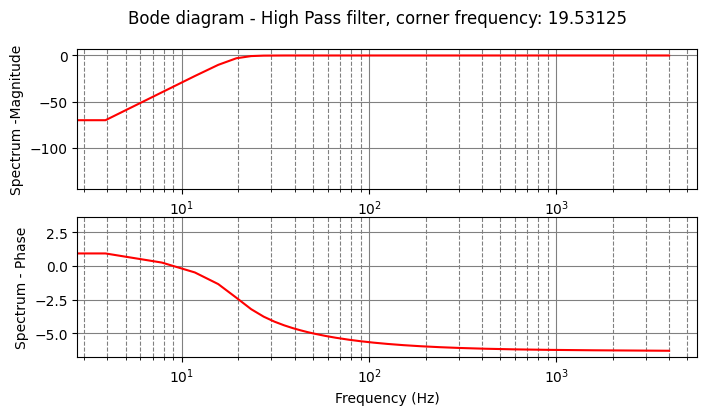

In [500]:
order=5
normal_cutoff=5*fs/NFFT
#----
b, a = signal.butter(order, normal_cutoff, btype='highpass', analog=False, output='ba', fs=fs)
wbutt, hbutt = signal.freqz(b, a,  worN=len(xx),fs=fs)
#----
print(len(wbutt), type(hbutt))
print(SubSeq_L)
fig, axs = plt.subplots(2, figsize=(8,4))
fig.suptitle("Bode diagram - High Pass filter, corner frequency: "+ str(normal_cutoff) )
axs[0].semilogx(xx,20*np.log10(abs(hbutt[0:NFFT//2])),color='r')
axs[0].set_xlabel("Frequency (Hz)") 
axs[0].set_ylabel("Spectrum -Magnitude")
axs[0].grid(which='major', color='grey', linestyle='-')  # Major grid
axs[0].grid(which='minor', color='grey', linestyle='--')  # Minor grid

#------------------------------------------------------------

axs[1].semilogx(xx,np.unwrap(np.angle(hbutt[0:NFFT//2])),color='r')
axs[1].set_xlabel("Frequency (Hz)") 
axs[1].set_ylabel("Spectrum - Phase")
axs[1].grid(which='major', color='grey', linestyle='-')  # Major grid
axs[1].grid(which='minor', color='grey', linestyle='--')  # Minor grid


In [501]:
#---  Frequency response (one-sided spectrum)
spectrum_B= FFT_spectrum_ba(Mat_DNA_B, NFFT, SubSeq_L, st, win, b, a)  #, spec_filter)
spectrum_F= FFT_spectrum_ba(Mat_DNA_F, NFFT, SubSeq_L, st, win, b, a)  #, spec_filter)
spectrum_M= FFT_spectrum_ba(Mat_DNA_M, NFFT, SubSeq_L, st, win, b, a)  #, spec_filter)
print(b,a , SubSeq_L)

[ 0.97548487 -4.87742434  9.75484868 -9.75484868  4.87742434 -0.97548487] [ 1.         -4.95035948  9.80266778 -9.70582768  4.8050901  -0.95157073] 2048


In [502]:
print(type(spectrum_B), spectrum_B.shape)
print(type(spectrum_F), spectrum_F.shape)
print(type(spectrum_M), spectrum_M.shape)

<class 'numpy.ndarray'> (553, 1024)
<class 'numpy.ndarray'> (874, 1024)
<class 'numpy.ndarray'> (2313, 1024)


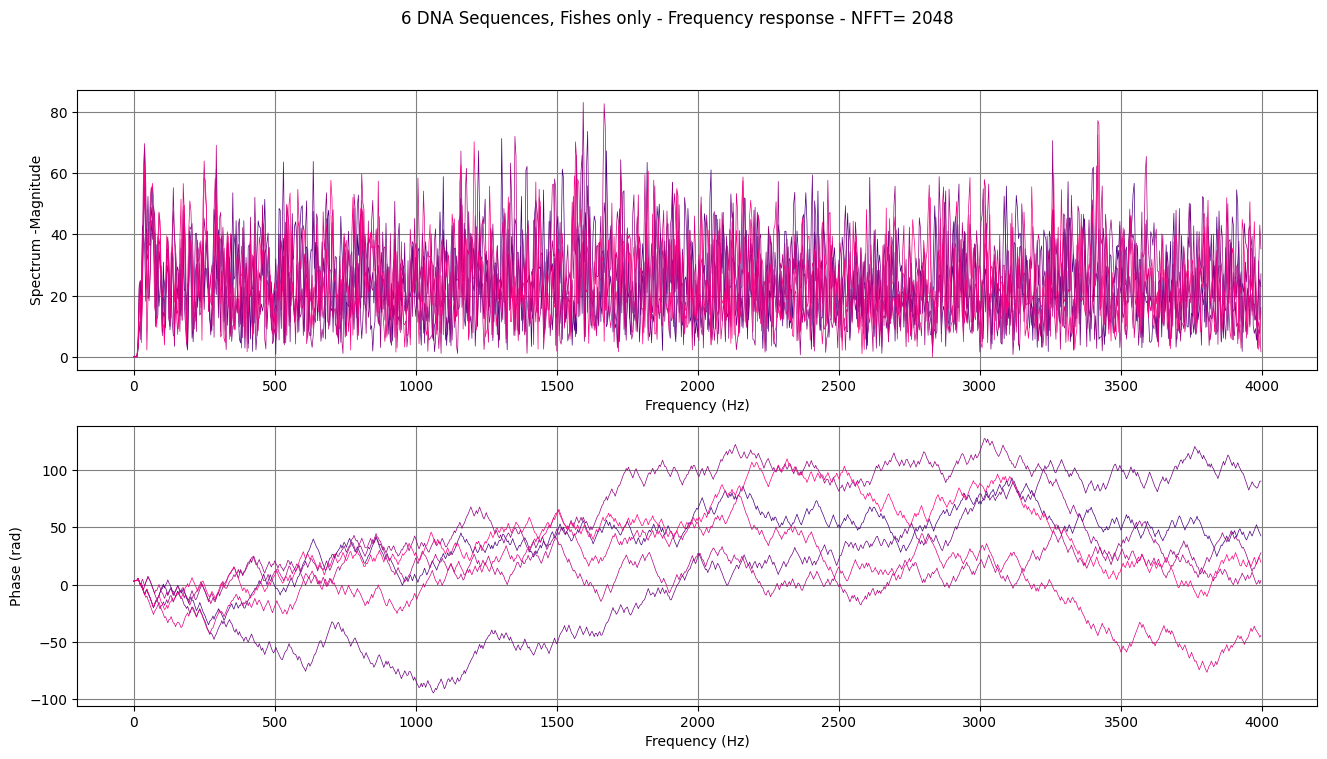

In [503]:
fig, axs = plt.subplots(2, figsize=(16,8))
fig.suptitle("6 DNA Sequences, Fishes only - Frequency response - NFFT= "+str(NFFT))
#  FFT Magnitude - HIGH-Pass 

for j in range(2,8) :
        #  FFT magnitude
        #axs[0].plot(xx,np.abs(spectrum_F[j]),color=((8-j)/8, 0.2, j/8), linewidth=0.5)
        # Ensure j/7 is between 0 and 1, and the green and blue channels are within valid range
        axs[0].plot(xx, np.abs(spectrum_F[j]), color=(min(j/7, 1), 0., 0.5), linewidth=0.5)

        #  FFT phase
        axs[1].plot(xx, np.unwrap(np.angle(spectrum_F[j])), color=(min(j/7, 1), 0., 0.5), linewidth=0.5)

#--------------------------
axs[0].set_xlabel("Frequency (Hz)") 
axs[0].set_ylabel("Spectrum -Magnitude")
axs[0].grid(which='major', color='grey', linestyle='-')  # Major grid
axs[0].grid(which='minor', color='grey', linestyle='--')  # Minor grid
#-----------------------------------------------------------------
axs[1].set_xlabel("Frequency (Hz)") 
axs[1].set_ylabel("Phase (rad)")
#axs[1].legend(['FFT', 'FFT w. window'])
axs[1].grid(which='major', color='grey', linestyle='-')  # Major grid
axs[1].grid(which='minor', color='grey', linestyle='--')  # Minor grid

plt.show()

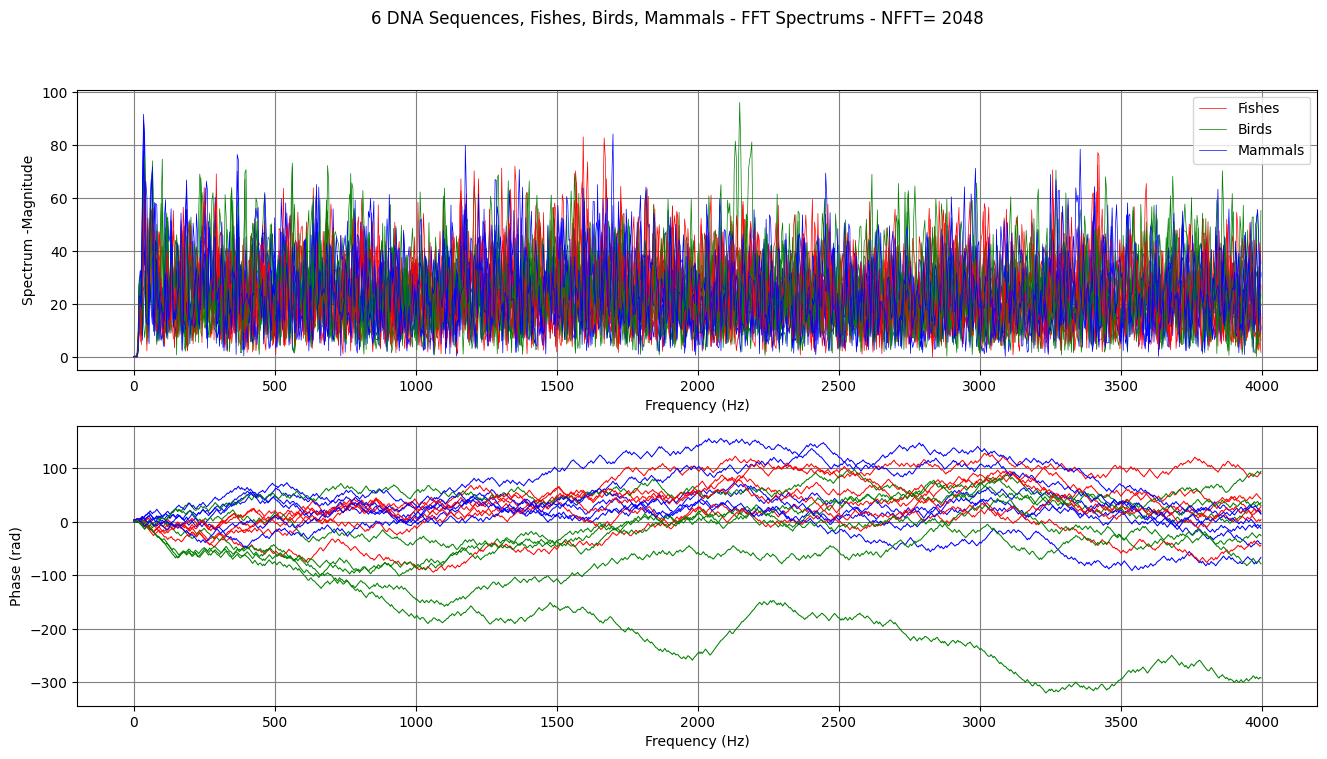

In [504]:
fig, axs = plt.subplots(2, figsize=(16,8))
fig.suptitle("6 DNA Sequences, Fishes, Birds, Mammals - FFT Spectrums - NFFT= "+str(NFFT))
# FFT magnitude

for j in range(2,8) :
#--------------------------    
#  FFT Spectrum magnitude
#--------------------------
    axs[0].plot(xx,np.abs(spectrum_F[j]),color='r', linewidth=0.5)
    axs[0].plot(xx,np.abs(spectrum_B[j]),color='g', linewidth=0.5)
    axs[0].plot(xx,np.abs(spectrum_M[j]),color='b', linewidth=0.5)
#-----------------------------
#  FFT Spectrum unwrap phase
#-----------------------------
    axs[1].plot(xx,np.unwrap(np.angle(spectrum_F[j])),color='r', linewidth=0.75)
    axs[1].plot(xx,np.unwrap(np.angle(spectrum_B[j])),color='g', linewidth=0.75)
    axs[1].plot(xx,np.unwrap(np.angle(spectrum_M[j])),color='b', linewidth=0.75)
#--------------------------
axs[0].legend(['Fishes', 'Birds', 'Mammals'])
axs[0].set_xlabel("Frequency (Hz)") 
axs[0].set_ylabel("Spectrum -Magnitude")
axs[0].grid(which='major', color='grey', linestyle='-')  # Major grid
axs[0].grid(which='minor', color='grey', linestyle='--')  # Minor grid

axs[1].set_xlabel("Frequency (Hz)") 
axs[1].set_ylabel("Phase (rad)")
#axs[1].legend(['FFT', 'FFT w. window'])
axs[1].grid(which='major', color='grey', linestyle='-')  # Major grid
axs[1].grid(which='minor', color='grey', linestyle='--')  # Minor grid

#plt.show()

In [505]:
spectrum_B_Mag=np.abs(spectrum_B)
spectrum_F_Mag=np.abs(spectrum_F)
spectrum_M_Mag=np.abs(spectrum_M)

In [506]:
spectrum_B_Phas=np.unwrap(np.angle(spectrum_B))
spectrum_F_Phas=np.unwrap(np.angle(spectrum_F))
spectrum_M_Phas=np.unwrap(np.angle(spectrum_M))

In [507]:
spec_B=np.append(spectrum_B_Mag, spectrum_B_Phas, axis=1)
spec_F=np.append(spectrum_F_Mag, spectrum_F_Phas, axis=1)
spec_M=np.append(spectrum_M_Mag, spectrum_M_Phas, axis=1)

In [508]:
spec_B.shape, spec_F.shape, spec_M.shape

((553, 2048), (874, 2048), (2313, 2048))

In [509]:
df_B = pd.DataFrame(spec_B)
df_F = pd.DataFrame(spec_F)
df_M = pd.DataFrame(spec_M)

In [510]:
#classB= np.arange(0,len(df_B), 1, dtype=int)
listB =  [0] * len(df_B)
listF =  [1] * len(df_F)
listM =  [2] * len(df_M)

df_B['Class'] = listB
df_F['Class'] = listF
df_M['Class'] = listM

In [511]:
df_BFM= pd.concat([df_B,  df_F, df_M],axis=0)
df_BFM.shape

(3740, 2049)

In [512]:
df_BFM.head()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,Class
0,0.257116,0.265807,0.292310,0.348669,4.759712,23.582602,19.497527,9.266912,37.991810,75.573557,...,34.912797,32.538887,30.385900,33.387658,34.272310,37.233524,39.274944,41.774926,43.926934,0
1,0.266390,0.273834,0.291004,0.127519,4.251757,12.371672,20.447865,48.221877,48.551878,21.948070,...,-94.805082,-97.377387,-94.951295,-92.446399,-92.909973,-90.244451,-88.011518,-85.696272,-82.699397,0
2,0.168188,0.184682,0.232546,0.377164,1.238632,19.014470,32.737362,29.044860,27.372383,25.417621,...,32.949946,34.431380,31.816999,30.810235,28.030575,31.071048,34.189565,31.564617,30.588455,0
3,0.172440,0.193697,0.256510,0.325769,2.755997,20.443196,22.859846,15.598782,10.530504,17.413111,...,86.020661,84.485113,87.394006,89.967443,91.692695,94.369323,91.358061,90.865825,93.944839,0
4,0.035657,0.084156,0.186526,0.953270,9.567816,27.231448,15.854888,27.799285,7.937270,19.384989,...,-290.951098,-287.929526,-289.801321,-292.814086,-289.871460,-292.174952,-293.910452,-291.046039,-291.796341,0


In [513]:
Y = df_BFM['Class'].to_numpy()
Y[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [514]:
col_i= np.arange(0,NFFT, 1, dtype=int)
list_col_i= col_i.tolist()
df1 = df_BFM[list_col_i]
X0=df1.to_numpy()

In [515]:
X0.shape

(3740, 2048)

In [516]:
transform = preprocessing.StandardScaler()

In [517]:
X = transform.fit_transform(X0)

In [518]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=5,  stratify= Y)

In [519]:
Y_train[0:20]

array([1, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2],
      dtype=int64)

In [520]:
print( X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2992, 2048) (748, 2048) (2992,) (748,)


In [521]:
#parameters ={"C":[0.01,0.1,1,5],'penalty':['l2'], 'solver':('newton-cg', 'lbfgs', 'liblinear')}# l1 lasso l2 ridge
parameters ={"C":[0.01,0.1,1,5],'penalty':['l2'], 'solver':['newton-cg']}# l1 lasso l2 ridge
#----------
lr=LogisticRegression(max_iter=1500)
print(parameters)

{'C': [0.01, 0.1, 1, 5], 'penalty': ['l2'], 'solver': ['newton-cg']}


In [522]:
logreg_cv=GridSearchCV(estimator=lr, param_grid=parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1500),
             param_grid={'C': [0.01, 0.1, 1, 5], 'penalty': ['l2'],
                         'solver': ['newton-cg']})

In [ ]:
acc_LR=logreg_cv.score(X_test, Y_test)
print('Accuracy:', acc_LR)

Accuracy: 0.9959893048128342


In [524]:
yhat_LR= logreg_cv.predict(X_test)
print (classification_report(Y_test, yhat_LR, target_names=['Speech', 'Fishes','Mammals'])  )

              precision    recall  f1-score   support

      Speech       1.00      0.98      0.99       110
      Fishes       0.99      0.99      0.99       175
     Mammals       1.00      1.00      1.00       463

    accuracy                           1.00       748
   macro avg       1.00      0.99      0.99       748
weighted avg       1.00      1.00      1.00       748



In [525]:
yhat_LR=logreg_cv.predict(X_test)

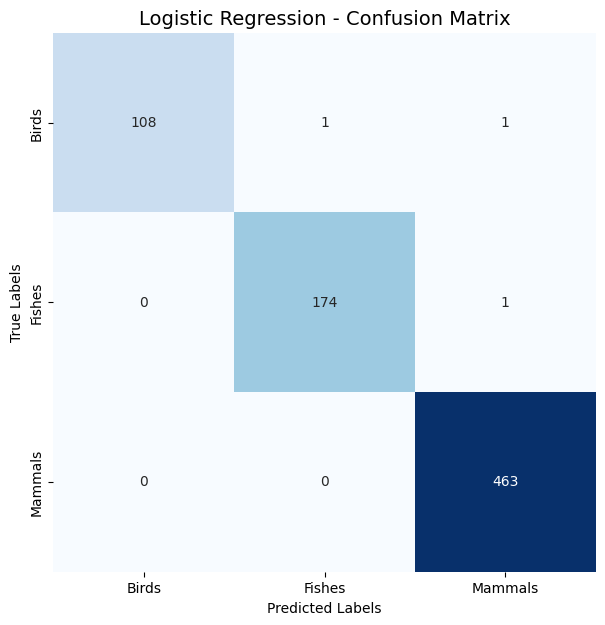

In [526]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assume you have Y_test and yhat_LR (your true labels and predicted labels)
cm = confusion_matrix(Y_test, yhat_LR)

# Create a figure for the plot
plt.figure(figsize=(7, 7))

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Birds', 'Fishes', 'Mammals'],  # Update with your class labels
            yticklabels=['Birds', 'Fishes', 'Mammals'])  # Update with your class labels

# Add title and labels
plt.title("Logistic Regression - Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [527]:
#parameters = {'kernel':['rbf'],
parameters = {'kernel':('linear','poly','rbf'),        
              'C': np.logspace(-3, 2, 5),
              #'gamma':np.logspace(-3, 1, 6)}
              'gamma':[0.001]}
svm = SVC()
print(parameters)

{'kernel': ('linear', 'poly', 'rbf'), 'C': array([1.00000000e-03, 1.77827941e-02, 3.16227766e-01, 5.62341325e+00,
       1.00000000e+02]), 'gamma': [0.001]}


In [528]:

svm_cv = GridSearchCV(svm,parameters,cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 1.77827941e-02, 3.16227766e-01, 5.62341325e+00,
       1.00000000e+02]),
                         'gamma': [0.001],
                         'kernel': ('linear', 'poly', 'rbf')})

In [529]:
print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.01778279410038923, 'gamma': 0.001, 'kernel': 'linear'}
accuracy : 0.9936465997770345


In [530]:
yhat_svm= svm_cv.predict(X_test)
print (classification_report(Y_test, yhat_svm, target_names=['Birds', 'Fishes','Mammals'])) 

              precision    recall  f1-score   support

       Birds       1.00      0.98      0.99       110
      Fishes       0.99      1.00      1.00       175
     Mammals       1.00      1.00      1.00       463

    accuracy                           1.00       748
   macro avg       1.00      0.99      1.00       748
weighted avg       1.00      1.00      1.00       748



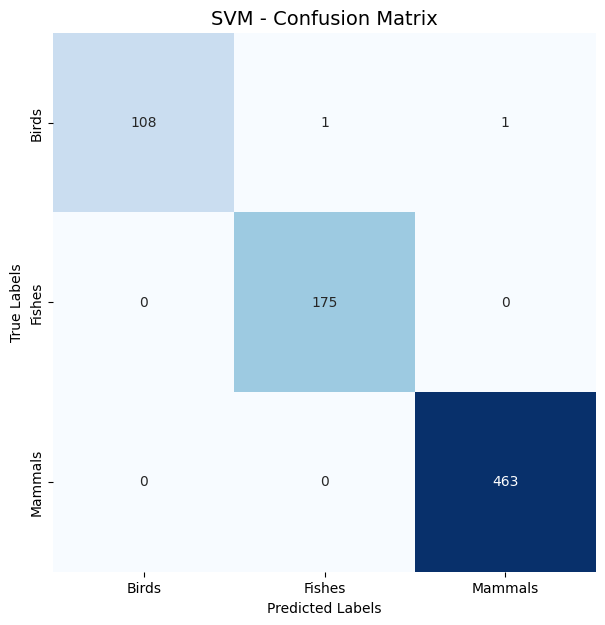

In [531]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming Y_test and yhat_svm are your true and predicted labels for the SVM model
cm = confusion_matrix(Y_test, yhat_svm)

# Create a figure for the plot
plt.figure(figsize=(7, 7))

# Use seaborn's heatmap to plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Birds', 'Fishes', 'Mammals'],  # Update with your class labels
            yticklabels=['Birds', 'Fishes', 'Mammals'])  # Update with your class labels

# Title and labels
plt.title("SVM - Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Save the figure
plt.savefig("BFM_figure2.png")
plt.show()


###CHECKING OVER other file

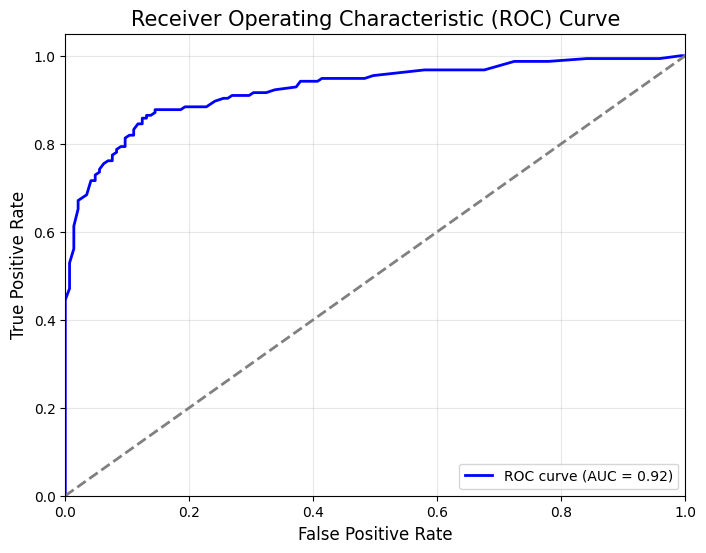

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Generate a synthetic dataset (replace this with your data)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier (replace RandomForestClassifier with your model if needed)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=15)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.show()
